In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# $\bar x$ and R chart

Description:

The $\bar x$ (pronounced X-bar) and R chart is a pair of control charts used to study variable data. It is especially useful for data that does not form a normal distribution, although it can be used with normal data as well. Data are subgrouped, and averages and ranges for each subgroup are plotted on separate charts.

Also called: averages and range chart

- https://en.wikipedia.org/wiki/X%CC%85_and_R_chart (last accessed: 1 April 2020)
- https://www.youtube.com/watch?v=-O9Q4Z-nmfI (last accessed: 1 April 2020)
- Quality Toolbox (2e) - Nancy R. Tague

In [2]:
# Create the sheet to read the parameters
n = np.arange(2,8)
d2 = np.array([1.128, 1.693, 2.059, 2.326, 2.534, 2.704])
A2 = np.array([1.880, 1.023, 0.729, 0.577, 0.483, 0.419])
D3 = np.array([0, 0, 0, 0, 0, 0.076])
D4 = np.array([3.267, 2.575, 2.282, 2.115, 2.004, 1.924])
sheet = np.vstack([n, d2, A2, D3, D4])

# Calling DataFrame constructor after to create the sheet, with columns specified 
sheet = pd.DataFrame({'Number of observations in subgroup, n':sheet[0,:], 'd2':sheet[1,:], 'A2':sheet[2,:], 'D3':sheet[3,:], 'D4':sheet[4,:]})

sheet.to_csv(r'data\sheet.csv',index=False)

In [3]:
sheet = pd.read_csv(r'data\sheet.csv')
sheet

,"Number of observations in subgroup, n",d2,A2,D3,D4
0,2.0,1.128,1.880,0.000,3.267
1,3.0,1.693,1.023,0.000,2.575
2,4.0,2.059,0.729,0.000,2.282
3,5.0,2.326,0.577,0.000,2.115
4,6.0,2.534,0.483,0.000,2.004
5,7.0,2.704,0.419,0.076,1.924


## R chart

- https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/control-charts/how-to/variables-data-in-subgroups/xbar-r-chart/methods-and-formulas/r-chart/ (last accessed: 27 April 2020)

Number of values in each subgroup = n

Number of subgroups to be used = k

Central line: $\mu = \bar{R} = \frac{\Sigma R_{i}}{k} = \frac{\Sigma max(x_{i}) - min(x_{i})}{k}$

Upper control line: $UCL_{R} = D_{4}\bar{R}$

Lower control line: $LCL_{R} = D_{3}\bar{R}$ or $LCL_{R}=0$

Plotted statistics: $R_{i}$

In [4]:
def read_data(path):
    return pd.read_csv(path)

# Read the data
path = r'data\Rchart_data.csv'
rdata = read_data(path)
rdata.head()

,Date,X1,X2,X3,X4
0,2/14/2019,218,224,220,231
1,2/14/2019,228,236,247,234
2,2/14/2019,280,228,228,221
3,2/15/2019,210,249,241,246
4,2/15/2019,243,240,230,230


In [5]:
# Clean data
del rdata['Date']
rdata.head()

,X1,X2,X3,X4
0,218,224,220,231
1,228,236,247,234
2,280,228,228,221
3,210,249,241,246
4,243,240,230,230


In [6]:
def compute_range(df):
    return df.max(axis=1) - df.min(axis=1)

# Compute the range for each row
rdata['Range'] = compute_range(rdata)
rdata.head()

,X1,X2,X3,X4,Range
0,218,224,220,231,13
1,228,236,247,234,19
2,280,228,228,221,59
3,210,249,241,246,39
4,243,240,230,230,13


In [7]:
# Compute the parameters
def compute_parameters(range_data, sheet):
    rbar = range_data[range_data.columns[-1]].mean()
    
    # Compute control lines
    ucl = sheet.at[len(rdata.columns)-1,'D4']*rbar
    
    lcl = sheet.at[len(rdata.columns)-1,'D3']*rbar
    
    return rbar, ucl, lcl

rbar, ucl, lcl = compute_parameters(rdata, sheet)

print(f'R_bar:               {rbar:.4f}')
print(f'Upper control limit: {ucl:.4f}')
print(f'Lower control limit: {lcl:.4f}')

R_bar:               18.3333
Upper control limit: 36.7400
Lower control limit: 0.0000


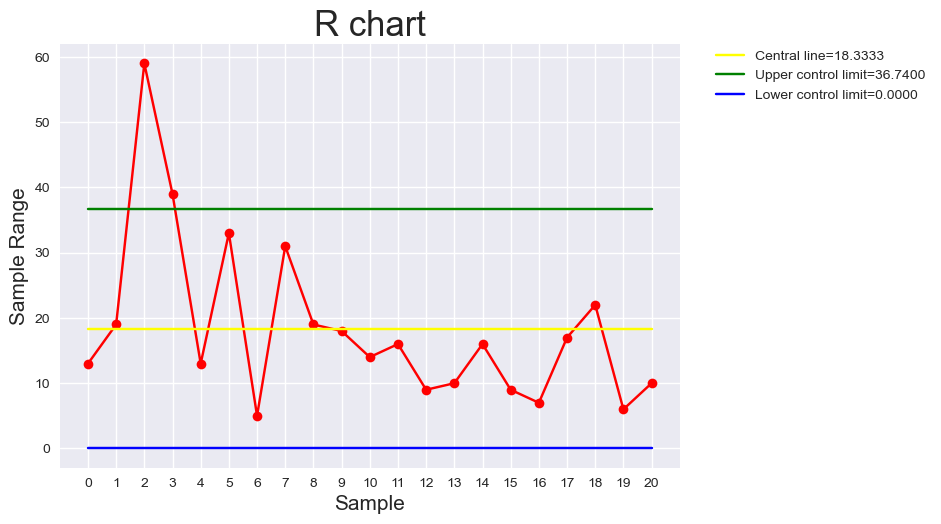

In [12]:
# Plot the R-chart
def plot_rchart(x_axis, y_axis, rbar, ucl, lcl, title, x_label, y_label):
    fig, ax = plt.subplots()

    ax.plot(x_axis, y_axis, 'o-', c='red')

    rbar_line = rbar*np.ones(x_axis.size)
    ax.plot(rbar_line, c='yellow', label=f'Central line={rbar:.4f}')

    ucl_line = ucl*np.ones(x_axis.size)
    ax.plot(ucl_line, c='green', label=f'Upper control limit={ucl:.4f}')

    lcl_line = lcl*np.ones(x_axis.size)
    ax.plot(lcl_line, c='blue', label=f'Lower control limit={lcl:.4f}')

    ax.set_xticks(np.arange(x_axis.size))
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax.set_title(title, fontsize=25)
    
    ax.set_xlabel(x_label, fontsize=15)
    
    ax.set_ylabel(y_label, fontsize=15)

    plt.show()

plot_rchart(x_axis=rdata.index, y_axis=rdata['Range'], rbar=rbar, ucl=ucl, lcl=lcl, title='R chart', x_label='Sample', y_label='Sample Range')

## $\bar x$ chart

- https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/control-charts/how-to/variables-data-in-subgroups/xbar-r-chart/methods-and-formulas/xbar-chart/ (last accessed: 27 April 2020)

Number of values in each subgroup = $n$

Number of subgroups to be used = $k$

Central line: $\bar{\bar{x}} = \dfrac{\Sigma \bar x_{i}}{k}$

Standard deviation: $\sigma_{\bar{x}} = \dfrac{\bar{R}}{d_{2}}$

$3\sigma_{\bar{x}} = A_{2}\bar{R}$

Upper control line: $UCL_{\bar{x}} = \bar{\bar{x}} + 3\sigma_{\bar{x}}$

Lower control line: $UCL_{\bar{x}} = \bar{\bar{x}} - 3\sigma_{\bar{x}}$

Plotted statistics: $\bar{x_{i}}$

In [13]:
# Clean data
del rdata['Range']
rdata.head()

,X1,X2,X3,X4
0,218,224,220,231
1,228,236,247,234
2,280,228,228,221
3,210,249,241,246
4,243,240,230,230


In [14]:
def compute_Xbar(df):
    return df.mean(axis=1)

# Compute X-bar for each row
rdata['X-bar'] = compute_Xbar(rdata)
rdata.head()

,X1,X2,X3,X4,X-bar
0,218,224,220,231,223.25
1,228,236,247,234,236.25
2,280,228,228,221,239.25
3,210,249,241,246,236.50
4,243,240,230,230,235.75


In [16]:
def compute_parameters(rdata, sheet, rbar):
    
    # Compute the central line X-double-bar
    x_double_bar = rdata[rdata.columns[-1]].mean()
    
    #three_sigma = sheet.at[len(rdata.columns)-1,'A2']*rbar
    sigma = rdata[rdata.columns[-1]].std()

    # Compute the upper and lower control limit
    #ucl = x_double_bar + three_sigma
    ucl = x_double_bar + 3*sigma

    #lcl = x_double_bar - three_sigma
    lcl = x_double_bar - 3*sigma
    
    return x_double_bar, ucl, lcl

x_double_bar, ucl, lcl = compute_parameters(rdata, sheet, rbar)

print(f'X-double-bar:                {x_double_bar:.4f}')
print(f'Upper control limit:         {ucl:.4f}')
print(f'Lower control limit:         {lcl:.4f}')

X-double-bar:                234.5952
Upper control limit:         256.9416
Lower control limit:         212.2489


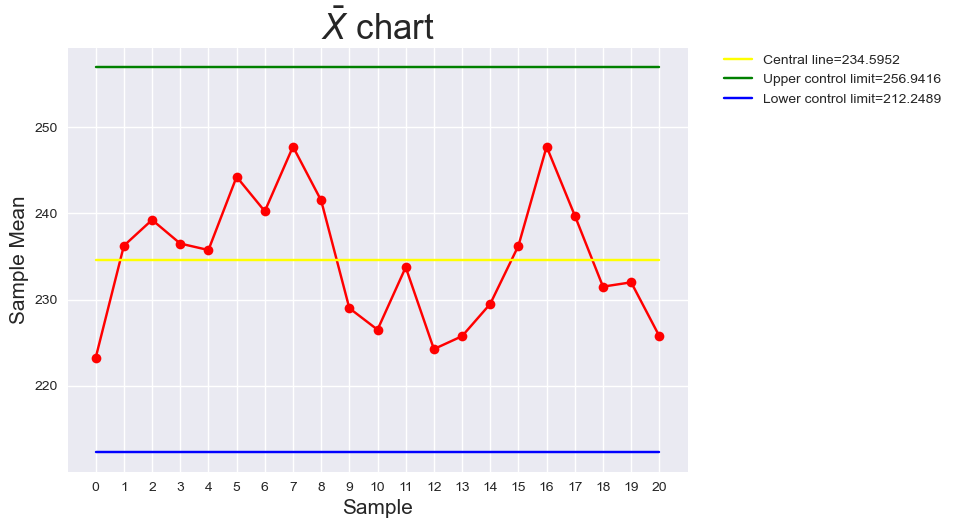

In [21]:
# Plot the x-bar-chart
def plot_xbarchart(x_axis, y_axis, x_double_bar, ucl, lcl, title, x_label, y_label):
    fig, ax = plt.subplots()
    
    ax.plot(x_axis, y_axis, 'o-', c='red')

    x_double_bar_line = x_double_bar*np.ones(x_axis.size)
    ax.plot(x_double_bar_line, c='yellow', label=f'Central line={x_double_bar:.4f}')

    ucl_line = ucl*np.ones(x_axis.size)
    ax.plot(ucl_line, c='green', label=f'Upper control limit={ucl:.4f}')

    lcl_line = lcl*np.ones(x_axis.size)
    ax.plot(lcl_line, c='blue', label=f'Lower control limit={lcl:.4f}')

    ax.set_xticks(np.arange(x_axis.size))

    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax.set_title(title, fontsize=25)

    ax.set_xlabel(x_label, fontsize=15)

    ax.set_ylabel(y_label, fontsize=15)

plot_xbarchart(x_axis=rdata.index, y_axis=rdata['X-bar'], x_double_bar=x_double_bar, ucl=ucl, lcl=lcl, title=r'$\bar{X}$ chart', x_label='Sample', y_label='Sample Mean')

## Validation

$\bar{X}$ and R control charts generated in Minitab 17 for comparison:

<img src="minitab\R_Xbar_chart.png" width="700" height="700" align="center"/>